#Asset Pricing Week 5 - Homework Questions

###Homework 1: Mean Variance Frontier

####Question 1

Suppose there are only two assets, $R$ (risky) with mean $\mu$ and standard deviation $\sigma$, and a risk free rate $R^f$. Find a formula for $R^∗$. Make it as pretty as you can.

There is a bit of algebra involved, so check that your final answer obeys the defining properties, the required values for $E(R^∗R)$ and $E(R^∗R^f)$. (What were those? Go look them up!) To grade your formula, report the weight on $R$. (Your formula will be equivalent to $R^∗$=(stuff) +(weight) × $R$. Report weight) Use $\mu=1.10$ (10%) $R^f=1.05$ (5%) $\sigma=0.20$ (20%).


In [3]:
import numpy as np

mu = 1.1
rf = 1.05
sigma = 0.2

muvec = np.array([rf, mu])
Sigma = np.reshape([0, 0, 0, sigma**2], (2, 2))
SM = np.outer(muvec, muvec) + Sigma
SM_inv = np.linalg.pinv(SM)
w = SM_inv.dot(np.ones(2)) / np.ones(2).dot(SM_inv.dot(np.ones(2)))
print ('{:.4f}'.format(w[1]))

-1.2353


####Question 2

In the same situation, find a formula for $R^{e∗}$ and make it as pretty as you can. Check that your formula obeys the defining properties for $R^{e∗}$. To grade your problem, report the weight of $R^{e∗}$ on $R$. (This will be the same as its weight on $R^e=R−R^f$. Why?)

In [2]:
E_Re = mu - rf
Sigma_Re = E_Re**2 + sigma**2
w_e = E_Re/Sigma_Re
print ('{:.4f}'.format(w_e))

1.1765


####Question 3

Download the data on Fama-French factors ff_factors.txt and Fama French portfolio returns ff_25.txt. Use data starting in 194701. (If you plot the data you will see a clear difference before and after 1947. Just why this massive stabilization happened is an open question.)

The factors rmrf hml and smb are already excess monthly percent returns. The 25 portfolio returns are monthly percent returns, not excess, so subtract the riskfree return to make them excess.

Calculate a time series of the excess return that generates the classic mean-variance frontier of excess returns of the 25 portfolios, $R^{emv} = (\Sigma^{-1} \mu)'R^e$. Report the mean, standard deviation, and Sharpe ratio of this return. Report the mean and standard deviation in the units of monthly percent. Report the Sharpe ratio of these monthly returns, i.e. don't annualize it. Enter the three numbers separated by spaces.

Hint: the most likely source of errors here are units: returns, excess returns, percent vs. net, etc. The mean of $R^{emv}$ in the requested units is between 10 and 20 percent per month. The key to computer problems is to look at your data and results every step of the way to make sure the numbers are reasonable.


15.2683 39.0746 0.3907


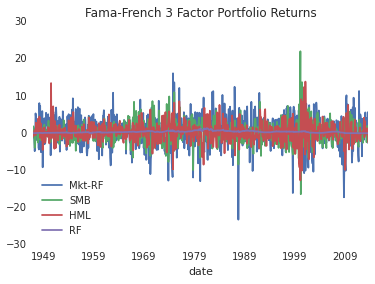

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns


#Load Fama and French 3 Factor Portfolio
ff3 = pd.read_csv('https://d396qusza40orc.cloudfront.net/assetpricing%2Fdata%2Fff_factors.txt',
                  skiprows=6, sep='\s+', index_col=0, parse_dates={'date':['%']},
                  date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))

ff3['1947-01-01':].plot(title='Fama-French 3 Factor Portfolio Returns');

#Load the 25 factors portfolio
ff25 = pd.read_csv('https://d396qusza40orc.cloudfront.net/assetpricing%2Fdata%2Fff_25.txt',
                  skiprows=5, sep='\s+', index_col=0, parse_dates={'date':['%']},
                  date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))

ff25.rename(columns={i:j for (i,j) in zip(ff25.columns, [i for i in range(1,26)])}, inplace=True)
ff25_rets = ff25['1947-01-01':].subtract(ff3.ix['1947-01-01':,'RF'], axis=0)

#Calculate expected return as Remv=(Σ−1μ)′Re 
w = np.linalg.pinv(ff25_rets.cov()).dot(ff25_rets.mean(0))
R_emv = ff25_rets['1947-01-01':].dot(w)

#Calculate portfolio standard deviation as w*Σ*w
S_emv = np.sqrt(w.dot(ff25_rets.cov()).dot(w))

#Calculate the portfolio Sharpe Ratio
SR_emv = R_emv.mean(0) / S_emv

print('{:.4f} {:.4f} {:.4f}'.format(R_emv.mean()*100, S_emv*100, SR_emv))

###Question 4

Next, calculate a time series of $R^{e∗}$ using the formula $R^{e*}=E(R^e)'E(R^e R^{e'})^{-1} R^e$. Report its mean, standard deviation and Sharpe ratio as you did in the last question. That is, report the three numbers in monthly percent units, separated by spaces. Of course, much of the point of doing this question is that you really figure out what the formulas mean. 

In [5]:
SM = ff25_rets.T.dot(ff25_rets)/ff25_rets.shape[0]
w_re = np.linalg.pinv(SM).dot(ff25_rets.mean(0))

R_e_star = ff25_rets.dot(w_re)
mu_R_e_star = R_e_star.mean()
sd_R_e_star = R_e_star.std()
SR_R_e_star = mu_R_e_star / sd_R_e_star

print('{:.4f} {:.4f} {:.4f}'.format(mu_R_e_star*100, sd_R_e_star*100, SR_R_e_star))

13.2602 33.9357 0.3907


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.4456
Date:                Wed, 01 Apr 2015   Prob (F-statistic):              0.646
Time:                        16:15:15   Log-Likelihood:                 44.007
No. Observations:                  25   AIC:                            -82.01
Df Residuals:                      22   BIC:                            -78.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0116      0.028     -0.414      0.683        -0.070     0.047
value          0.0058      0.006      0.930      0.362        -0.007     0.019
cap           -0.0010      0.006     -0.162      0.873        -0.014     0.012
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.452
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.313
Skew:                           0.257   Prob(JB):                        0.855
Kurtosis:                       2.811   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

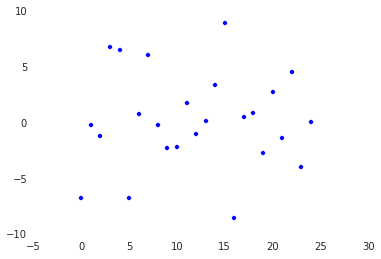

In [6]:
import statsmodels.formula.api as sm

sns.plt.scatter(range(w.shape[0]), w*100)

value = np.tile(range(1,6), 5)
cap = np.repeat(range(1,6), repeats=5)
sm.ols(formula='w ~ value + cap', data={'w' : w, 'value' : value, 'cap' : cap}).fit().summary()

####Question 5

Examine the weights of the mean-variance efficient portfolio $w=\Sigma^{-1}\mu$. Which of the following characterizes the weights?

>**Answer: The weights have strong long (positive) and short (negative) values, spread pretty much randomly across the size and book/market portfolios**


####Question 6

Now, make a graph of the mean-standard deviation frontier.

Calculate the frontier generated by $R^{emv}$ and the frontier generated by $R^{e∗}$. (You calculated these in previous problems. The frontier is just the mean and variance of $\delta R^{emv}$ and $\delta R^{e∗}$ for various $\delta$.

Include the mean and standard deviation of $R^{emv}$, that of $R^{e∗}$, and those of the Fama French factors rmrf,hml,smb. (These are points, not lines.) The position of rmrf gives you the Sharpe ratio of the market, which is a value-weighted combination of the FF portfolios. That gives you a sense of how much better than just holding the market the mean-variance optimizer thinks it can do.

Include the mean-standard deviation frontier generated by the three factors rmrf, hml, and smb. This is a simple way to see how well you might be able to do by deviating from the market towards value and small. 

/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


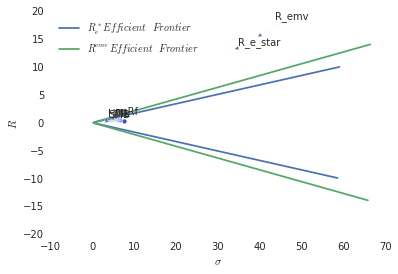

In [7]:
def make_frontier(R_star, R_alt, w):
    y = np.c_[R_star, R_alt].mean(0).dot(np.array([w, 1-w]))
    x = np.sqrt(np.c_[w**2, w*(1-w), w*(1-w), (1-w)**2].dot(np.cov(R_star, R_alt).flatten()))
    return x,y

#Calculate R_star             
SM = ff25['1947-01-01':].cov() + np.outer(ff25['1947-01-01':].mean(0), 
                                          ff25['1947-01-01':].mean(0))
w_r = np.linalg.pinv(SM).dot(np.ones(ff25.shape[1]))
R_star = ff25['1947-01-01':].dot(w_r)

#Make the two efficient frontiers
delta = np.linspace(-200, 200, num=500)
R_e_x, R_e_y     = make_frontier(R_star, R_e_star, delta)
R_emv_x, R_emv_y = make_frontier(R_star, R_emv, delta)

#Plot results with 25 portfolios
fig, ax = sns.plt.subplots()
ax.plot(R_e_x, R_e_y, label='$R_e^* Efficient \;Frontier$')
ax.plot(R_emv_x, R_emv_y,label='$R^{emv} Efficient \;Frontier$')
ax.annotate('R_emv', (S_emv*100, R_emv.mean(0)*100), xytext=(20,20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('R_e_star', (sd_R_e_star*100, mu_R_e_star*100), xytext=(5, 5), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('rmRf', (ff3.ix['1947-01-01':,'Mkt-RF'].std(), ff3.ix['1947-01-01':,'Mkt-RF'].mean()), 
            xytext=(5,5), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('SMB', (ff3.ix['1947-01-01':,'SMB'].std(), ff3.ix['1947-01-01':,'SMB'].mean()), 
            xytext=(5, 5), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('HML', (ff3.ix['1947-01-01':,'HML'].std(), ff3.ix['1947-01-01':,'HML'].mean()), 
            xytext=(5, 5), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.scatter(ff25_rets.std(), ff25_rets.mean(), c=ff25_rets.mean(), cmap=sns.plt.cm.coolwarm)
ax.legend(loc='best')
sns.plt.xlabel('$\sigma$')
sns.plt.ylabel('$R$');

>**Answer: The $R^{emv}$ frontier is exactly the same as the $R^{e∗}$ frontier. These are two ways of calculating the same object. $R^{emv}$ and $R^{e∗}$ are both on the top half of the frontier. **

###Question 7

Continuing the last question, (continue to look at your graph)

>**Answer: $R^{emv}$ lies somewhat further out than $R^{e∗}$. Both portfolios lie a lot further out than the FF factor portfolios.**

###Question 8

Continuing the last question, (continue to look at your graph)
>**Answer: The factors rmrf hml and smb, and the original 25 assets all seem to lie well inside the frontier.**

####Question 9
Now, compute betas of each of your 25 portfolio excess returns against $R^{e∗}$, $R^{ei}_t=\alpha_i+\beta_i R^{e*}_t+\epsilon_t^i,\; t=1,2,\dots, T \  \forall i$ and compute the means of each excess return. Make a plot of the 25 mean excess returns (y-axis) against the 25 betas (x-axis). 

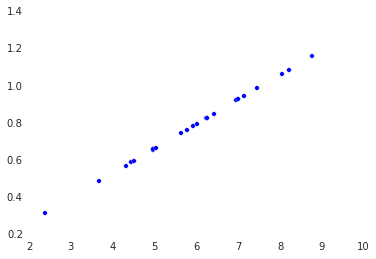

In [9]:
beta_repr = sm.OLS(ff25_rets.values, R_e_star).fit()
sns.plt.scatter(beta_repr.params, ff25_rets.mean(0));

>**Answer: The 25 mean return - beta pairs lie exactly on a straight line going through the origin, verifying the Roll theorem.**

####Question 10

Compute $E(R^{e*}R^{ei})$ and $E(R^{ei})$ for your 25 portfolios. Report these two values separated by a space, for only the first (first column in the .txt file) of the 25 portfolios. Report in monthly percent.


In [8]:
rets = pd.DataFrame(np.c_[ff25_rets.multiply(R_e_star, axis=0).mean(),  ff25_rets.mean()], 
             columns= ['$E(R^{e*})$', '$E(R^{ei})$'], index=ff25_rets.columns)
print('{:.4f} {:.4f}'.format(*rets.ix[1]))
rets

0.3163 0.3166


,$E(R^{e*})$,$E(R^{ei})$
1,0.316282,0.316625
2,0.785497,0.786350
3,0.824667,0.825562
4,0.988227,0.989300
5,1.160365,1.161625
6,0.486859,0.487388
7,0.764770,0.765600
8,0.927356,0.928363
9,0.944575,0.945600
10,1.086633,1.087812


####Question 11

Now, let's try out of sample. The in-sample mean-variance frontier obviously includes a lot of luck. To what extent does using these formulas help us to find the "true" or out of sample mean-variance frontier?

Estimate your weights for $R^{emv}$ and $R^{e∗}$ on data up until 199001 (i.e. include 198912 but not 199001), and then construct the returns $R^{emv}$ and $R^{e∗}$ for 199001 to the end of the sample using those weights. I.e. compute $w=\Sigma^{-1} \mu$ from data up through 198912, and then construct $R^{emv}_t=w′_tR^e_t$ for 19901 to the end of the sample using those weights, and the same for $R^{e∗}$.

Plot the mean-standard deviation frontier of excess returns generated by these $R^{emv}$ and $R^{e∗}$. Include the means and standard deviations of the FF 25 portfolios and FF 3 factors, using only data from 199001 forward. Also include the ex-post mean-standard deviation frontier, i.e. using 199001 and later data to compute the weights. We will call that "in sample," and the behavior of the 1990-now frontier with weights estimated up to 1990 the "out of sample" frontier.

Finally, include the mean-standard deviation frontier generated by the three factors, both the "out of sample" and "in sample" frontiers. This will allow you to compare the reduction in mean-variance efficiency between in sample and out of sample from the factors to that from the 25 portfolios. Fama and French essentially say that their three factors capture the exploitable mean-variance efficiency of the 25 portfolios. Let's see if they are right. 

/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


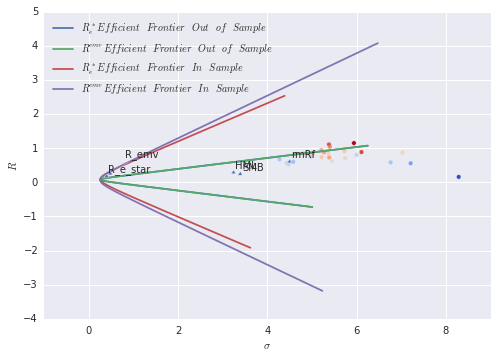

In [9]:
#Split train and test data
ff3_rets_train  = ff3.ix['1947-01-01':'1989-12-01']
ff3_rets_test   = ff3.ix['1990-01-01':]
ff25_rets_train = ff25.ix['1947-01-01':'1989-12-01']
ff25_rets_test  = ff25.ix['1990-01-01':]

#Calculate expected return as Remv=(Σ−1μ)′Re 'in sample'
w_train = np.linalg.pinv(ff25_rets_train.cov()).dot(ff25_rets_train.mean(0))
R_emv_train = ff25_rets_train.dot(w_train)

#Calculate R_e* 'in sample'
SM_train = ff25_rets_train.cov() + np.outer(ff25_rets_train.mean(0),(ff25_rets_train.mean(0)))
w_re_train = np.linalg.pinv(SM_train).dot(ff25_rets_train.mean(0))
R_e_star_train = ff25_rets_train.dot(w_re_train)

#Work out the 'out of sample' equivalent
R_emv_test = ff25_rets_test.dot(w_train)
R_e_star_test = ff25_rets_test.dot(w_train)

#Calculate expected return as Remv=(Σ−1μ)′Re 'ex post'
w_ex_post = np.linalg.pinv(ff25_rets_test.cov()).dot(ff25_rets_test.mean(0))
R_emv_ex_post = ff25_rets_test.dot(w_ex_post)

#Calculate R_e* 'ex post'
SM_ex_post = ff25_rets_test.cov() + np.outer(ff25_rets_test.mean(0),(ff25_rets_test.mean(0)))
w_re_ex_post = np.linalg.pinv(SM_ex_post).dot(ff25_rets_test.mean(0))
R_e_star_ex_post = ff25_rets_test.dot(w_re_ex_post)


#Make the two efficient frontiers
delta = np.linspace(-10, 10, num=500)
R_e_x_oos, R_e_y_oos     = make_frontier(R_star.ix['1990-01-01':], 
                                         R_e_star_test, delta)
R_emv_x_oos, R_emv_y_oos = make_frontier(R_star.ix['1990-01-01':], 
                                         R_emv_test, delta)
R_e_x_ex_post, R_e_y_ex_post     = make_frontier(R_star.ix['1990-01-01':], 
                                         R_e_star_ex_post, delta)
R_emv_x_ex_post, R_emv_y_ex_post = make_frontier(R_star.ix['1990-01-01':], 
                                         R_emv_ex_post, delta)

#Plot results with 25 portfolios
fig, ax = sns.plt.subplots()
ax.plot(R_e_x_oos, R_e_y_oos, label='$R_e^* Efficient \;Frontier \; Out \; of \; Sample"$')
ax.plot(R_emv_x_oos, R_emv_y_oos,label='$R^{emv} Efficient \;Frontier \; Out \; of \; Sample$')
ax.plot(R_e_x_ex_post, R_e_y_ex_post, label='$R_e^* Efficient \;Frontier \; In \; Sample$')
ax.plot(R_emv_x_ex_post, R_emv_y_ex_post,label='$R^{emv} Efficient \;Frontier \; In \; Sample$')
ax.annotate('R_emv', (R_emv.ix['1990-01-01':].std(0), R_emv.ix['1990-01-01':].mean(0)), 
            xytext=(20,20), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('R_e_star', (R_e_star.ix['1990-01-01':].std(0), R_e_star.ix['1990-01-01':].mean(0)), 
            xytext=(5, 5), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('rmRf', (ff3.ix['1990-01-01':,'Mkt-RF'].std(0), ff3.ix['1990-01-01':,'Mkt-RF'].mean(0)), 
            xytext=(5,5), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('SMB', (ff3.ix['1990-01-01':,'SMB'].std(0), ff3.ix['1990-01-01':,'SMB'].mean(0)), 
            xytext=(5, 5), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('HML', (ff3.ix['1990-01-01':,'HML'].std(0), ff3.ix['1990-01-01':,'HML'].mean(0)), 
            xytext=(5, 5), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.scatter(ff25_rets.ix['1990-01-01':].std(0), ff25_rets.ix['1990-01-01':].mean(0), 
           c=ff25_rets.mean(), cmap=sns.plt.cm.coolwarm)
ax.legend(loc='best')
sns.plt.xlabel('$\sigma$')
sns.plt.ylabel('$R$');

>**Answer: The out-of-sample frontier falls to about the same value as the frontier generated by the portfolios, still about twice the market Sharpe ratio and just above the individual 25 portfolios.  **

####Question 12

Continuing the last question, which statement best characterizes the factor frontier in your graph?

>**Answer: The frontier formed from the three factor portfolios is not much bigger in sample than out of sample.**

####Question 13

Next, let's replicate the Roll theorem using out of sample mean-variance efficent returns. Use the out-of-sample mean-variance efficient return (either $R^{e∗}$ or $R^{emv}$) (the returns generated by pre-sample weights times 1990-end returns) as the right hand variable in regressions of returns on the mean-variance efficient return, $R^{ei}_t=\alpha_i+\beta_i R^{e*}_t+\epsilon_t^i$, 1990-end of sample. Plot the 1990-end of sample mean (y-axis) excess returns $E(R^{ei})$ against the 1990-end of sample betas $\beta_i$ (x-axis). Which statement best characterizes your plot? 

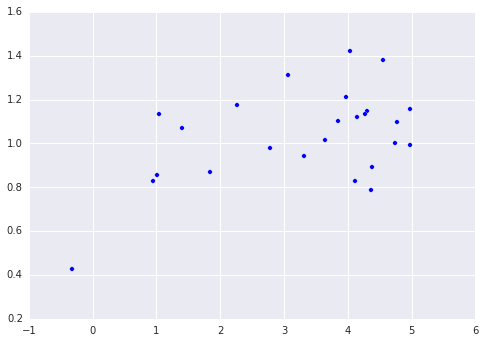

In [10]:
beta_repr_oos = sm.OLS(ff25_rets_test.values, R_e_star_test).fit()
sns.plt.scatter(beta_repr_oos.params, ff25_rets_test.mean(0));

>**Answer: The relationship between mean excess return and beta out of sample is destroyed, the points have a big scatter and only a very slight positive slope is detectable. **

###Homework: Conditional and Unconditional Frontiers 

####Question 1

To clarify the conditional vs. unconditional mean-variance frontier, let's work through an example.

Suppose there is a single excess return $R^e_{t+1}$, and an information variable $I_t$ which can take two values, $I_t=1,2$ with equal 1/2 probability. Use values

$E(R_{t+1}^{e}\mid I_{t}=1)=E(R_{t+1}^{e}\mid I_{t}=2)=8\%$

and

$\sigma(R_{t+1}^{e}\mid I_{t}=1)=16\%,\:\sigma(R_{t+1}^{e}\mid I_{t}=2)=24\%$

The notation $E_{t}(R_{t+1})=E(R_{t+1}\mid I_{t})$ mean the same thing. We will also consider the unconditional moments, i.e. $E(R_{t+1}^{e})=E[E(R_{t+1}^{e}\mid I_{t})]$, etc. Our goal is to understand the conditional and unconditional mean-variance frontiers for excess returns in this situation.

Since there is only one return, that return has to be on the conditional mean-variance frontier. Thus, the conditional frontiers have Sharpe ratios 0.08/0.16 = 1/2 in state 1 and 0.08/0.24 = 1/3 in state 2.

Now, let's find the Hansen-Richard characterization of the conditional mean-variance frontier.

The conditional payoff space is $z_{t+1} = c_t \times R^{e}_{t+1}$ where $c_t$ is a number chosen after you see It. With one excess return you can take more or less of it, period. These are all zero price payoffs, so $\underline{R}^e$ and $\underline{X}$ are the same.

The conditional mean-variance frontier of such excess returns is $w_tR^{e*}_{t+1}$ where $w_t$ are weights that sweep out the frontier, and $R^{e*}_{t+1}$ is the special excess return with the property $E_t(R^{e*}_{t+1}z_{t+1})=E_t(z_{t+1}) \ \ \forall z_{t+1} \in \underline{R}^e$.

In this example, like all payoffs and excess returns, $R^{e*}_{t+1}$ is of the form $R^{e*}_{t+1}=c_tR^e_{t+1}$. So your job is to find $c_t$ in state 1 and then state 2 that produce $R^{e*}_{t+1}=c_tR^e_{t+1}$. Report two numbers separated by a space.


In [5]:
mu = np.array([0.08, 0.08])
sigma = np.array([0.16, 0.24])


print ('{:.4f} {:.4f}'.format(*mu/(mu**2+sigma**2)))

2.5000 1.2500


####Question 2

Now, recall that the same $R^{e∗}_{t+1}$ also generates the unconditional mean-variance frontier. The unconditional frontier is $w R^{e∗}_{t+1}$ where $w$ is a constant that does not vary across information sets.

The slope of your conditional frontiers was 0.08/0.16=0.5 and 0.08/0.24 = 0.33. What is the slope of the unconditional frontier? Report a decimal value.

In [7]:
SR = np.array([0.5, 1/3])
SM_inv = np.cov(np.array([[mu[0], sigma[0]**2],[mu[1], sigma[1]**2]]))
w = SM_inv.dot(np.ones(2)) / np.ones(2).dot(SM_inv.dot(np.ones(2)))

print('{:.4f}'.format((SR*w).dot(np.ones(2))))

0.4514


####Question 3

Is the original return $R^e_{t+1}$ on the unconditional frontier? Are any fixed-weight investments $k R^e_{t+1}, k≠0$ on the unconditional frontier?

>**Answer: No. To get unconditional efficiency, you have use market timing portfolios that invest more in the high-Sharpe ratio state **

####Question 4

Now, let's construct the unconditional frontier with classic methods. Find the unconditional mean and standard deviation of a portfolio $c(z_t)R^e_{t+1}$, and pick $c(z_t)$ to minimize unconditional variance for a given unconditional mean. Note: this will take about a page of algebra. Report the two numerical values of $c(z_{t=1})$ and $c(z_{t=2})$, separated by a space, that generate an unconditionally efficient portfolio with unconditional mean equal to 8%. 

The solution is to find the roots of this equation:

$$\frac{1}{2}\lambda \frac{E_{1}^{2}}{E_{1}^{2}+\sigma _{1}^{2}}+\frac{1}{2}
\lambda \frac{E_{2}^{2}}{E_{2}^{2}+\sigma _{2}^{2}} =\mu$$ 

$$\lambda  =\frac{2\mu }{\frac{E_{1}^{2}}{E_{1}^{2}+\sigma _{1}^{2}}+\frac{
E_{2}^{2}}{E_{2}^{2}+\sigma _{2}^{2}}}$$




In [8]:
E = mu**2 / (mu**2 + sigma**2)
c = np.array([2*E[0], 2*E[1]])/E.sum()
print ('{:.4f} {:.4f}'.format(*c))

1.3333 0.6667
